In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v
from video_read import download_video

In [24]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [39]:
reload(v)
df,fps = v.get_vid_df('videos/Delete & Killshot - Disco Weapon [Epilepsy Warning].mp4')
fps

30

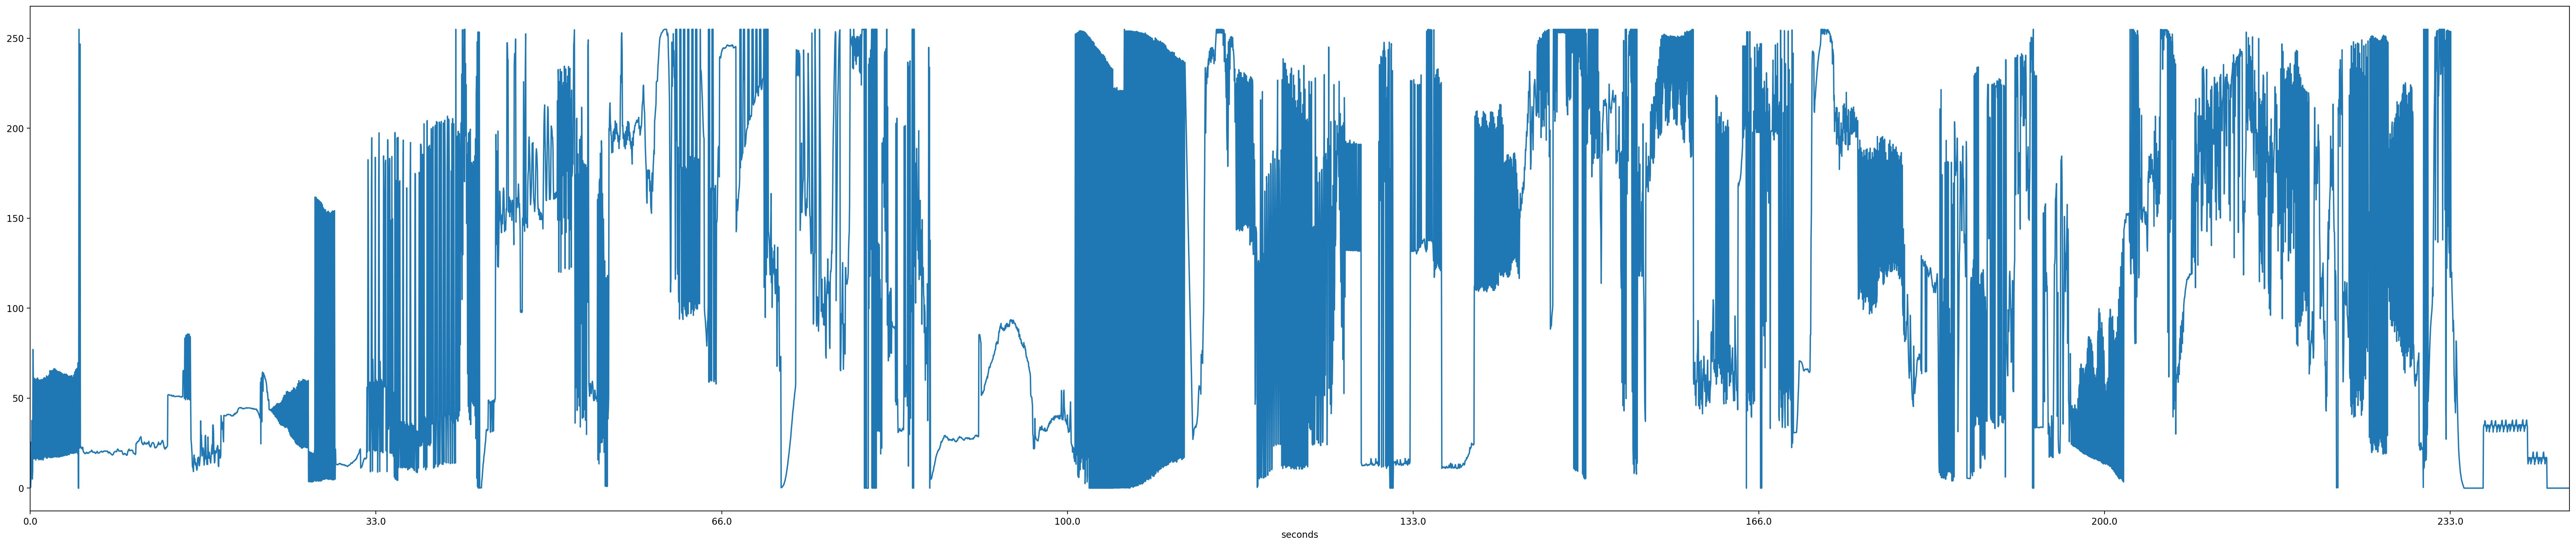

In [44]:
plt.figure(figsize=(50,10))
val = df.groupby('frame').value.mean().plot.line()
val.set_xlim((0,df.index.get_level_values(0).max()))

val.set_xticklabels(val.get_xticks() // fps)
val.set_xlabel('seconds')
plt.show()